### Do your imports!

In [123]:
import pandas as pd

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [124]:
df=pd.read_csv("/Users/egads/Desktop/FOUNDATIONS/07-homework (1)/311/subset.csv", nrows=30000)

In [125]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [126]:
pd.set_option('display.max_rows', 500)
display(df)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,41730707,02/18/2019 06:03:00 PM,02/21/2019 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11357,151-64 22 AVENUE,ADDRESS,Whitestone,Closed,QUEENS,PHONE
29996,41730708,02/18/2019 03:31:00 PM,02/21/2019 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10305,415 BURGHER AVENUE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE
29997,41730709,02/18/2019 03:12:00 PM,02/21/2019 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11215,78 8 AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
29998,41730710,02/18/2019 01:44:00 PM,02/26/2019 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11231,141 KANE STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE


## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [127]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Address Type', 'City', 'Status', 'Borough',
       'Open Data Channel Type'],
      dtype='object')

In [128]:
df = df.rename(columns={'Unique Key': 'unique_key', 'Created Date': 'created_date', 'Closed Date': 'closed_date',
                    'Agency': 'agency', 'Agency Name': 'agency_name', 'Complaint Type':  'complaint_type', 
                        'Descriptor': 'descriptor', 'Location Type': 'location_type', 'Incident Zip': 'incident_zip', 
                        'Incident Address': 'incident_address', 'Address Type': 'address_type', 'City': 'city', 
                        'Status': 'status', 'Borough': 'borough',
       'Open Data Channel Type': 'open_data_channel_type'})


In [129]:
df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'address_type', 'city', 'status', 'borough',
       'open_data_channel_type'],
      dtype='object')

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [130]:
df.dtypes

unique_key                 int64
created_date              object
closed_date               object
agency                    object
agency_name               object
complaint_type            object
descriptor                object
location_type             object
incident_zip              object
incident_address          object
address_type              object
city                      object
status                    object
borough                   object
open_data_channel_type    object
dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [131]:
df['closed_date'] =  pd.to_datetime(df['closed_date'], format='%m/%d/%Y %H:%M:%S %p')

In [132]:
df['created_date'] =  pd.to_datetime(df['created_date'], format='%m/%d/%Y %H:%M:%S %p')

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [133]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [134]:
df['month_call']= pd.to_datetime(df.created_date, format='%m%d').dt.strftime('%B')
df.head(10)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_call
0,41694420,2019-01-27 07:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,January
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,January
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,February
3,41694423,2019-02-13 03:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,February
4,41694424,2019-02-13 01:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,February
5,41694425,2019-02-13 12:44:06,2019-02-13 09:16:20,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11219,1238 50 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,February
6,41694426,2019-01-31 08:31:53,2019-02-13 02:48:55,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10040,9 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,January
7,41694430,2019-02-13 10:31:12,2019-02-21 02:16:41,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11420,109-40 128 STREET,ADDRESS,SOUTH OZONE PARK,Closed,QUEENS,PHONE,February
8,41694431,2019-01-27 09:24:14,2019-02-13 01:45:47,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11225,827 NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,January
9,41694432,2019-02-13 12:37:00,2019-02-14 12:00:00,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10018,17 WEST 38 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,February


In [135]:
df.month_call.value_counts().head(1)

February    28559
Name: month_call, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [136]:
df['month_call']= pd.to_datetime(df.created_date, format='%m%d').dt.strftime('%B %Y')
df.head(10)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_call
0,41694420,2019-01-27 07:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,January 2019
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,January 2019
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,February 2019
3,41694423,2019-02-13 03:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,February 2019
4,41694424,2019-02-13 01:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,February 2019
5,41694425,2019-02-13 12:44:06,2019-02-13 09:16:20,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11219,1238 50 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,February 2019
6,41694426,2019-01-31 08:31:53,2019-02-13 02:48:55,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10040,9 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,January 2019
7,41694430,2019-02-13 10:31:12,2019-02-21 02:16:41,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11420,109-40 128 STREET,ADDRESS,SOUTH OZONE PARK,Closed,QUEENS,PHONE,February 2019
8,41694431,2019-01-27 09:24:14,2019-02-13 01:45:47,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11225,827 NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,January 2019
9,41694432,2019-02-13 12:37:00,2019-02-14 12:00:00,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10018,17 WEST 38 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,February 2019


In [137]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [138]:
df.month_call.value_counts().head(1)

February 2019    28559
Name: month_call, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [139]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

## What time of day (by hour) is the least common for 311 complains? The most common?


In [140]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [141]:
df['hour_call']= pd.to_datetime(df.created_date, format='%H%M%S').dt.strftime('%H')
df.head(10)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_call,hour_call
0,41694420,2019-01-27 07:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,January 2019,07
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,January 2019,11
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,February 2019,12
3,41694423,2019-02-13 03:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,February 2019,03
4,41694424,2019-02-13 01:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,February 2019,01
5,41694425,2019-02-13 12:44:06,2019-02-13 09:16:20,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11219,1238 50 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,February 2019,12
6,41694426,2019-01-31 08:31:53,2019-02-13 02:48:55,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10040,9 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,January 2019,08
7,41694430,2019-02-13 10:31:12,2019-02-21 02:16:41,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11420,109-40 128 STREET,ADDRESS,SOUTH OZONE PARK,Closed,QUEENS,PHONE,February 2019,10
8,41694431,2019-01-27 09:24:14,2019-02-13 01:45:47,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11225,827 NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,January 2019,09
9,41694432,2019-02-13 12:37:00,2019-02-14 12:00:00,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10018,17 WEST 38 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,February 2019,12


In [142]:
df = df.drop('month_call', 1)

/var/folders/32/0w52m10j7fvd2gmsgc11sprw0000gn/T/ipykernel_3472/1921640562.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('month_call', 1)


In [143]:
df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,hour_call
0,41694420,2019-01-27 07:26:21,2019-02-13 10:53:25,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,07
1,41694421,2019-01-29 11:06:56,2019-02-13 02:07:22,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE,11
2,41694422,2019-02-13 12:28:18,2019-03-15 09:54:50,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,12
3,41694423,2019-02-13 03:40:19,2019-02-20 06:18:35,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE,03
4,41694424,2019-02-13 01:18:31,2019-02-20 05:36:54,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,41730707,2019-02-18 06:03:00,2019-02-21 12:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11357,151-64 22 AVENUE,ADDRESS,Whitestone,Closed,QUEENS,PHONE,06
29996,41730708,2019-02-18 03:31:00,2019-02-21 12:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10305,415 BURGHER AVENUE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,03
29997,41730709,2019-02-18 03:12:00,2019-02-21 12:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11215,78 8 AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,03
29998,41730710,2019-02-18 01:44:00,2019-02-26 12:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11231,141 KANE STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,01


In [144]:
df.hour_call.tail()

29995    06
29996    03
29997    03
29998    01
29999    11
Name: hour_call, dtype: object

In [145]:
df.hour_call.value_counts().sort_values(ascending=True).head(1)

05    1763
Name: hour_call, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:title={'center':'Least Call Per Hour'}>

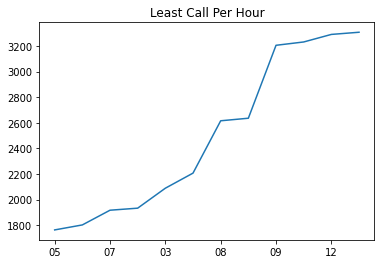

In [146]:
df.hour_call.value_counts().sort_values(ascending=True).plot(title='Least Call Per Hour')

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [147]:
df.agency

0         HPD
1         HPD
2         DOF
3         DOT
4         DOT
         ... 
29995    DSNY
29996    DSNY
29997    DSNY
29998    DSNY
29999    DSNY
Name: agency, Length: 30000, dtype: object

In [148]:
df.agency.value_counts()


HPD      11677
NYPD      8486
DSNY      3540
DOT       2548
DEP       1860
DOB        651
DOHMH      516
DPR        214
TLC        171
DCA        139
DOF         78
DFTA        75
DHS          9
EDC          8
DCAS         8
DOE          8
DOITT        6
ACS          4
TAX          1
DCP          1
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [149]:
NYPD - New York Police Department
HPD - Housing Preservation Development
DOT - Department of Transportation
DSNY - Department of Sanitation New York
DEP - Department of Environmental Protection

SyntaxError: invalid syntax (1277102030.py, line 1)

## What is the most common complaint to HPD?

In [ ]:
# GROUPING BY GAVE ME AN OPPORTUNITY TO LOOK AT CATEGORIES I AM INTERESTED IN 

In [151]:
df.groupby(['agency', 'complaint_type']).count()

unique_key  created_date  \
agency complaint_type                                                      
ACS    Forms                                             4             4   
DCA    Consumer Complaint                              139           139   
DCAS   Question                                          8             8   
DCP    Research Questions                                1             1   
DEP    Air Quality                                      75            75   
       Asbestos                                         14            14   
       Hazardous Materials                              23            23   
       Industrial Waste                                 13            13   
       Lead                                             89            89   
       Noise                                           791           791   
       Plant                                             2             2   
       Sewer                                           257           257   
       Water Conservation                               39            39   
       Water Quality                                    17            17   
       Water System                                    540           540   
DFTA   Alzheimer's Care                                  1             1   
       Home Delivered Meal - Missed Delivery             1             1   
       Housing - Low Income Senior                      52            52   
       Housing Options                                  17            17   
       Senior Center Complaint                           4             4   
DHS    Homeless Person Assistance                        9             9   
DOB    BEST/Site Safety                                  3             3   
       Boilers                                          21            21   
       Building/Use                                    223           223   
       Cranes and Derricks                               1             1   
       Electrical                                       34            34   
       Emergency Response Team (ERT)                     2             2   
       General Construction/Plumbing                   278           278   
       Investigations and Discipline (IAD)              16            16   
       Plumbing                                         43            43   
       Special Projects Inspection Team (SPIT)          30            30   
DOE    School Maintenance                                8             8   
DOF    Advocate-Personal Exemptions                      3             3   
       Advocate-Prop Refunds/Credits                     3             3   
       DOF Property - Payment Issue                     59            59   
       DRIE                                             11            11   
       SCRIE                                             1             1   
       Taxpayer Advocate Inquiry                         1             1   
DOHMH  Asbestos                                          8             8   
       Beach/Pool/Sauna Complaint                        4             4   
       Food Establishment                              108           108   
       Food Poisoning                                   42            42   
       Indoor Air Quality                               40            40   
       Indoor Sewage                                    11            11   
       Mold                                              5             5   
       Rodent                                          276           276   
       Unsanitary Animal Pvt Property                   17            17   
       Unsanitary Pigeon Condition                       5             5   
DOITT  Public Payphone Complaint                         6             6   
DOT    Bike Rack Condition                               1             1   
       Bridge Condition                                  3             3   
       Broken Parkin

In [150]:
df.groupby(['agency', 'complaint_type']).sum()

unique_key
agency complaint_type                                       
ACS    Forms                                       166879309
DCA    Consumer Complaint                         5798412766
DCAS   Question                                    333759720
DCP    Research Questions                           41717530
DEP    Air Quality                                3128542303
       Asbestos                                    583972795
       Hazardous Materials                         959452886
       Industrial Waste                            542285226
       Lead                                       3712867592
       Noise                                     32997896842
       Plant                                        83435547
       Sewer                                     10720475193
       Water Conservation                         1626759985
       Water Quality                               709101604
       Water System                              22526611111
DFTA   Alzheimer's Care                             41729611
       Home Delivered Meal - Missed Delivery        41723168
       Housing - Low Income Senior                2169126947
       Housing Options                             709134115
       Senior Center Complaint                     166862104
DHS    Homeless Person Assistance                  375481948
DOB    BEST/Site Safety                            125145845
       Boilers                                     876007406
       Building/Use                               9302648513
       Cranes and Derricks                          41729673
       Electrical                                 1418139814
       Emergency Response Team (ERT)                83418172
       General Construction/Plumbing             11596676766
       Investigations and Discipline (IAD)         667334987
       Plumbing                                   1793544662
       Special Projects Inspection Team (SPIT)    1251474743
DOE    School Maintenance                          333732185
DOF    Advocate-Personal Exemptions                125141138
       Advocate-Prop Refunds/Credits               125126629
       DOF Property - Payment Issue               2460657630
       DRIE                                        458830777
       SCRIE                                        41717583
       Taxpayer Advocate Inquiry                    41698800
DOHMH  Asbestos                                    333721982
       Beach/Pool/Sauna Complaint                  166856729
       Food Establishment                         4505300599
       Food Poisoning                             1752162885
       Indoor Air Quality                         1668497611
       Indoor Sewage                               458847978
       Mold                                        208583572
       Rodent                                    11513288190
       Unsanitary Animal Pvt Property              709191759
       Unsanitary Pigeon Condition                 208593506
DOITT  Public Payphone Complaint                   250294215
DOT    Bike Rack Condition                          41717570
       Bridge Condition                            125136659
       Broken Parking Meter                       7133297782
       Bus Stop Shelter Complaint                  208545127
       Bus Stop Shelter Placement                  166858860
       Curb Condition                             1793911158
       Highway Condition                          1543529371
       Sidewalk Condition                         8927219921
       Street Condition                          42466317498
       Street Light Condition                    25026883432
       Street Sign - Damaged                      2461309888
       Street Sign - Dangling                     1209620285
       Street Sign - Missing                      2002330311
       Traffic Signal Condition                  13181816356
DPR    Animal in a Park                            292050717
       DPR Internal     

In [ ]:
df.complaint_type.head()

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [152]:
df.groupby(['complaint_type']).sum()


,unique_key
complaint_type,
APPLIANCE,12719843469
Advocate-Personal Exemptions,125141138
Advocate-Prop Refunds/Credits,125126629
Air Quality,3128542303
Alzheimer's Care,41729611
Animal Abuse,3545772968
Animal in a Park,292050717
Asbestos,917694777
BEST/Site Safety,125145845


## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [ ]:
# Why did you pick these columns to calculate the answer?

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

### What month do most of the complaints happen in? I'd like to see a graph.

### Are the people getting in trouble usually beekeepers or not beekeepers?

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

Save it as a new column called `time_to_fix`

## Which agency has the best time-to-fix time?

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)